In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [3]:
df = pd.read_csv("./heart.csv")
df.head(10)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
5,39,M,NAP,120,339,0,Normal,170,N,0.0,Up,0
6,45,F,ATA,130,237,0,Normal,170,N,0.0,Up,0
7,54,M,ATA,110,208,0,Normal,142,N,0.0,Up,0
8,37,M,ASY,140,207,0,Normal,130,Y,1.5,Flat,1
9,48,F,ATA,120,284,0,Normal,120,N,0.0,Up,0


In [4]:
df.sample(20)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
198,53,M,ASY,120,246,0,Normal,116,Y,0.0,Flat,1
330,60,M,NAP,115,0,1,Normal,143,N,2.4,Up,1
164,52,F,ATA,140,225,0,Normal,140,N,0.0,Up,0
180,52,M,ASY,130,225,0,Normal,120,Y,2.0,Flat,1
876,60,M,ASY,130,206,0,LVH,132,Y,2.4,Flat,1
803,62,F,ASY,140,394,0,LVH,157,N,1.2,Flat,0
679,63,M,TA,145,233,1,LVH,150,N,2.3,Down,0
732,56,F,ASY,200,288,1,LVH,133,Y,4.0,Down,1
122,46,M,ASY,110,240,0,ST,140,N,0.0,Up,0
67,32,M,ATA,110,225,0,Normal,184,N,0.0,Up,0


In [5]:
df.shape

(918, 12)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,918.0,53.510893,9.432617,28.0,47.00,54.0,60.0,77.0
RestingBP,918.0,132.396514,18.514154,0.0,120.00,130.0,140.0,200.0
Cholesterol,918.0,198.799564,109.384145,0.0,173.25,223.0,267.0,603.0
FastingBS,918.0,0.233115,0.423046,0.0,0.00,0.0,0.0,1.0
MaxHR,918.0,136.809368,25.460334,60.0,120.00,138.0,156.0,202.0
Oldpeak,918.0,0.887364,1.066570,-2.6,0.00,0.6,1.5,6.2
HeartDisease,918.0,0.553377,0.497414,0.0,0.00,1.0,1.0,1.0


In [11]:
df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [13]:
df.dtypes

Age                 int64
Sex                object
ChestPainType      object
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG         object
MaxHR               int64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
HeartDisease        int64
dtype: object

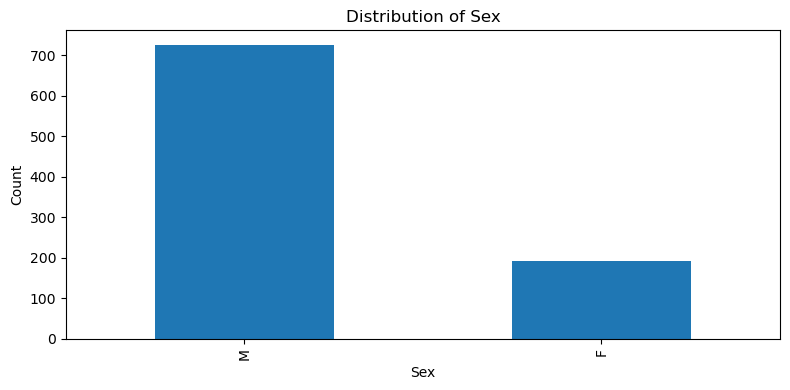

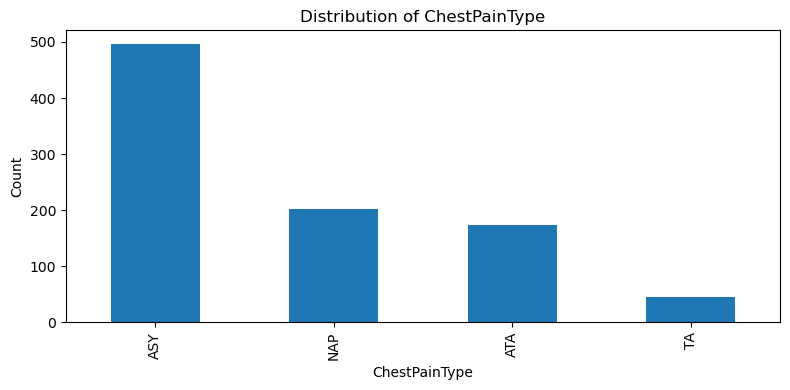

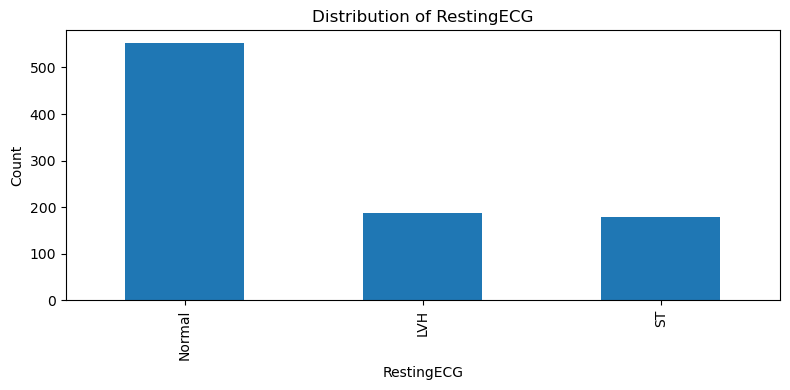

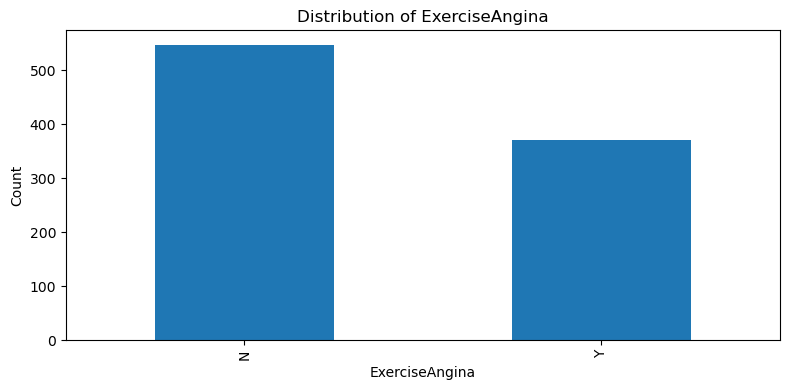

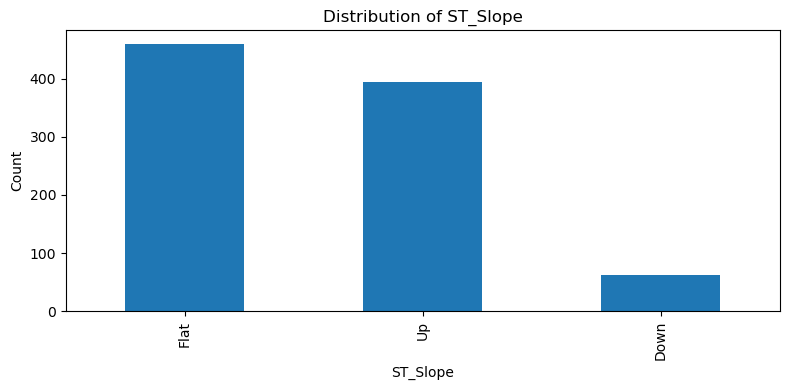

In [14]:
categorical_cols = [col for col in df.columns if df[col].dtype == 'object']

for col in categorical_cols:
    plt.figure(figsize=(8, 4))
    df[col].value_counts().plot(kind='bar')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.tight_layout()
    plt.show()

In [15]:
le = LabelEncoder()
df["Sex"] = le.fit_transform(df["Sex"])
df["ExerciseAngina"] = le.fit_transform(df["ExerciseAngina"])

In [16]:
df[["Sex", "ExerciseAngina"]].head()

,Sex,ExerciseAngina
0,1,0
1,0,0
2,1,0
3,0,1
4,1,0


In [17]:
cat_cols = ["ChestPainType", "RestingECG", "ST_Slope"]

df_encoded = pd.get_dummies(df, columns=cat_cols, dtype=int)

In [18]:
df_encoded

,Age,Sex,RestingBP,Cholesterol,FastingBS,MaxHR,ExerciseAngina,Oldpeak,HeartDisease,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,40,1,140,289,0,172,0,0.0,0,0,1,0,0,0,1,0,0,0,1
1,49,0,160,180,0,156,0,1.0,1,0,0,1,0,0,1,0,0,1,0
2,37,1,130,283,0,98,0,0.0,0,0,1,0,0,0,0,1,0,0,1
3,48,0,138,214,0,108,1,1.5,1,1,0,0,0,0,1,0,0,1,0
4,54,1,150,195,0,122,0,0.0,0,0,0,1,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,1,110,264,0,132,0,1.2,1,0,0,0,1,0,1,0,0,1,0
914,68,1,144,193,1,141,0,3.4,1,1,0,0,0,0,1,0,0,1,0
915,57,1,130,131,0,115,1,1.2,1,1,0,0,0,0,1,0,0,1,0
916,57,0,130,236,0,174,0,0.0,1,0,1,0,0,1,0,0,0,1,0


In [19]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [20]:
target_col = "HeartDisease"

x = df_encoded.drop(columns=[target_col])
y = df_encoded[target_col]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [21]:
x_train_std_df = pd.DataFrame(x_train_scaled, columns=x_train.columns, index=x_train.index)
x_test_std_df = pd.DataFrame(x_test_scaled, columns=x_test.columns, index=x_test.index)

In [22]:
x_train_std_df.head()

,Age,Sex,RestingBP,Cholesterol,FastingBS,MaxHR,ExerciseAngina,Oldpeak,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
795,-1.245067,0.540605,-0.708985,0.372803,1.842609,2.284353,-0.838461,-0.097061,-1.097362,-0.483336,1.879059,-0.213504,-0.504679,0.808179,-0.487621,3.780432,-1.03325,-0.847921
25,-1.886236,0.540605,-0.166285,0.086146,-0.542709,1.652241,-0.838461,-0.836286,-1.097362,-0.483336,1.879059,-0.213504,-0.504679,0.808179,-0.487621,-0.264520,-1.03325,1.179356
84,0.250993,0.540605,0.919115,0.123134,1.842609,-0.441628,1.192662,0.087745,0.911276,-0.483336,-0.532181,-0.213504,-0.504679,0.808179,-0.487621,-0.264520,0.96782,-0.847921
10,-1.779375,-1.849780,-0.166285,0.104640,-0.542709,0.229991,-0.838461,-0.836286,-1.097362,-0.483336,1.879059,-0.213504,-0.504679,0.808179,-0.487621,-0.264520,-1.03325,1.179356
344,-0.283314,0.540605,-0.708985,-1.846478,1.842609,-1.271274,-0.838461,-0.836286,0.911276,-0.483336,-0.532181,-0.213504,-0.504679,0.808179,-0.487621,-0.264520,0.96782,-0.847921


In [23]:
scaler_mm = MinMaxScaler()
x_train_mm = scaler_mm.fit_transform(x_train)
x_test_mm = scaler_mm.transform(x_test)
x_train_mm_df = pd.DataFrame(x_train_mm, columns=x_train.columns, index=x_train.index)
x_test_mm_df = pd.DataFrame(x_test_mm, columns=x_test.columns, index=x_test.index)

In [24]:
x_train_mm_df

,Age,Sex,RestingBP,Cholesterol,FastingBS,MaxHR,ExerciseAngina,Oldpeak,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
795,0.270833,1.0,0.60,0.398010,1.0,0.943662,0.0,0.386364,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
25,0.145833,1.0,0.65,0.346600,0.0,0.830986,0.0,0.295455,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
84,0.562500,1.0,0.75,0.353234,1.0,0.457746,1.0,0.409091,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
10,0.166667,0.0,0.65,0.349917,0.0,0.577465,0.0,0.295455,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
344,0.458333,1.0,0.60,0.000000,1.0,0.309859,0.0,0.295455,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,0.395833,0.0,0.60,0.421227,0.0,0.352113,0.0,0.295455,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
270,0.333333,1.0,0.60,0.373134,0.0,0.563380,0.0,0.295455,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
860,0.645833,1.0,0.65,0.419569,0.0,0.591549,1.0,0.454545,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
435,0.645833,1.0,0.76,0.000000,0.0,0.408451,1.0,0.295455,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
